# TRABAJO UT8: REDUCCIÓN DE DIMENSIONALIDAD

In [ ]:
# Se monta el drive en el colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preparamos el entorno
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos el csv
ruta = '/content/drive/MyDrive/CSVs/Cancer_Data.csv'
data = pd.read_csv(ruta,
                      header=0,
                      sep=",",
                      decimal=".",
                      quotechar="\"",
                      encoding='utf-8',
)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## ANÁLISIS DE VARIABLES

Variable Objetivo:
* diagnosis

Variables numéricas:
* radius_mean
* texture_mean
* perimeter_mean
* area_mean
* smoothness_mean
* compactness_mean
* concavity_mean
* concave points_mean
* symmetry_mean
* fractal_dimension_mean
* radius_se
* texture_se
* perimeter_se
* area_se
* smoothness_se
* compactness_se
* concavity_se
* concave points_se
* symmetry_se
* fractal_dimension_se
* radius_worst
* texture_worst
* perimeter_worst
* area_worst
* smoothness_worst
* compactness_worst
* concavity_worst
* concave points_worst
* symmetry_worst
* fractal_dimension_worst



In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
data = pd.get_dummies(data, columns=['diagnosis'])
data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_B,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,0,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,0,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,0,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,0,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,0,1


In [ ]:
data = data.drop('Unnamed: 32', axis=1)
data = data.drop('diagnosis_B', axis=1)
data = data.drop('id', axis=1)

<ipython-input-113-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-113-970c29e40805>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])
<ipython-input-113-970c29e40805>:8: 

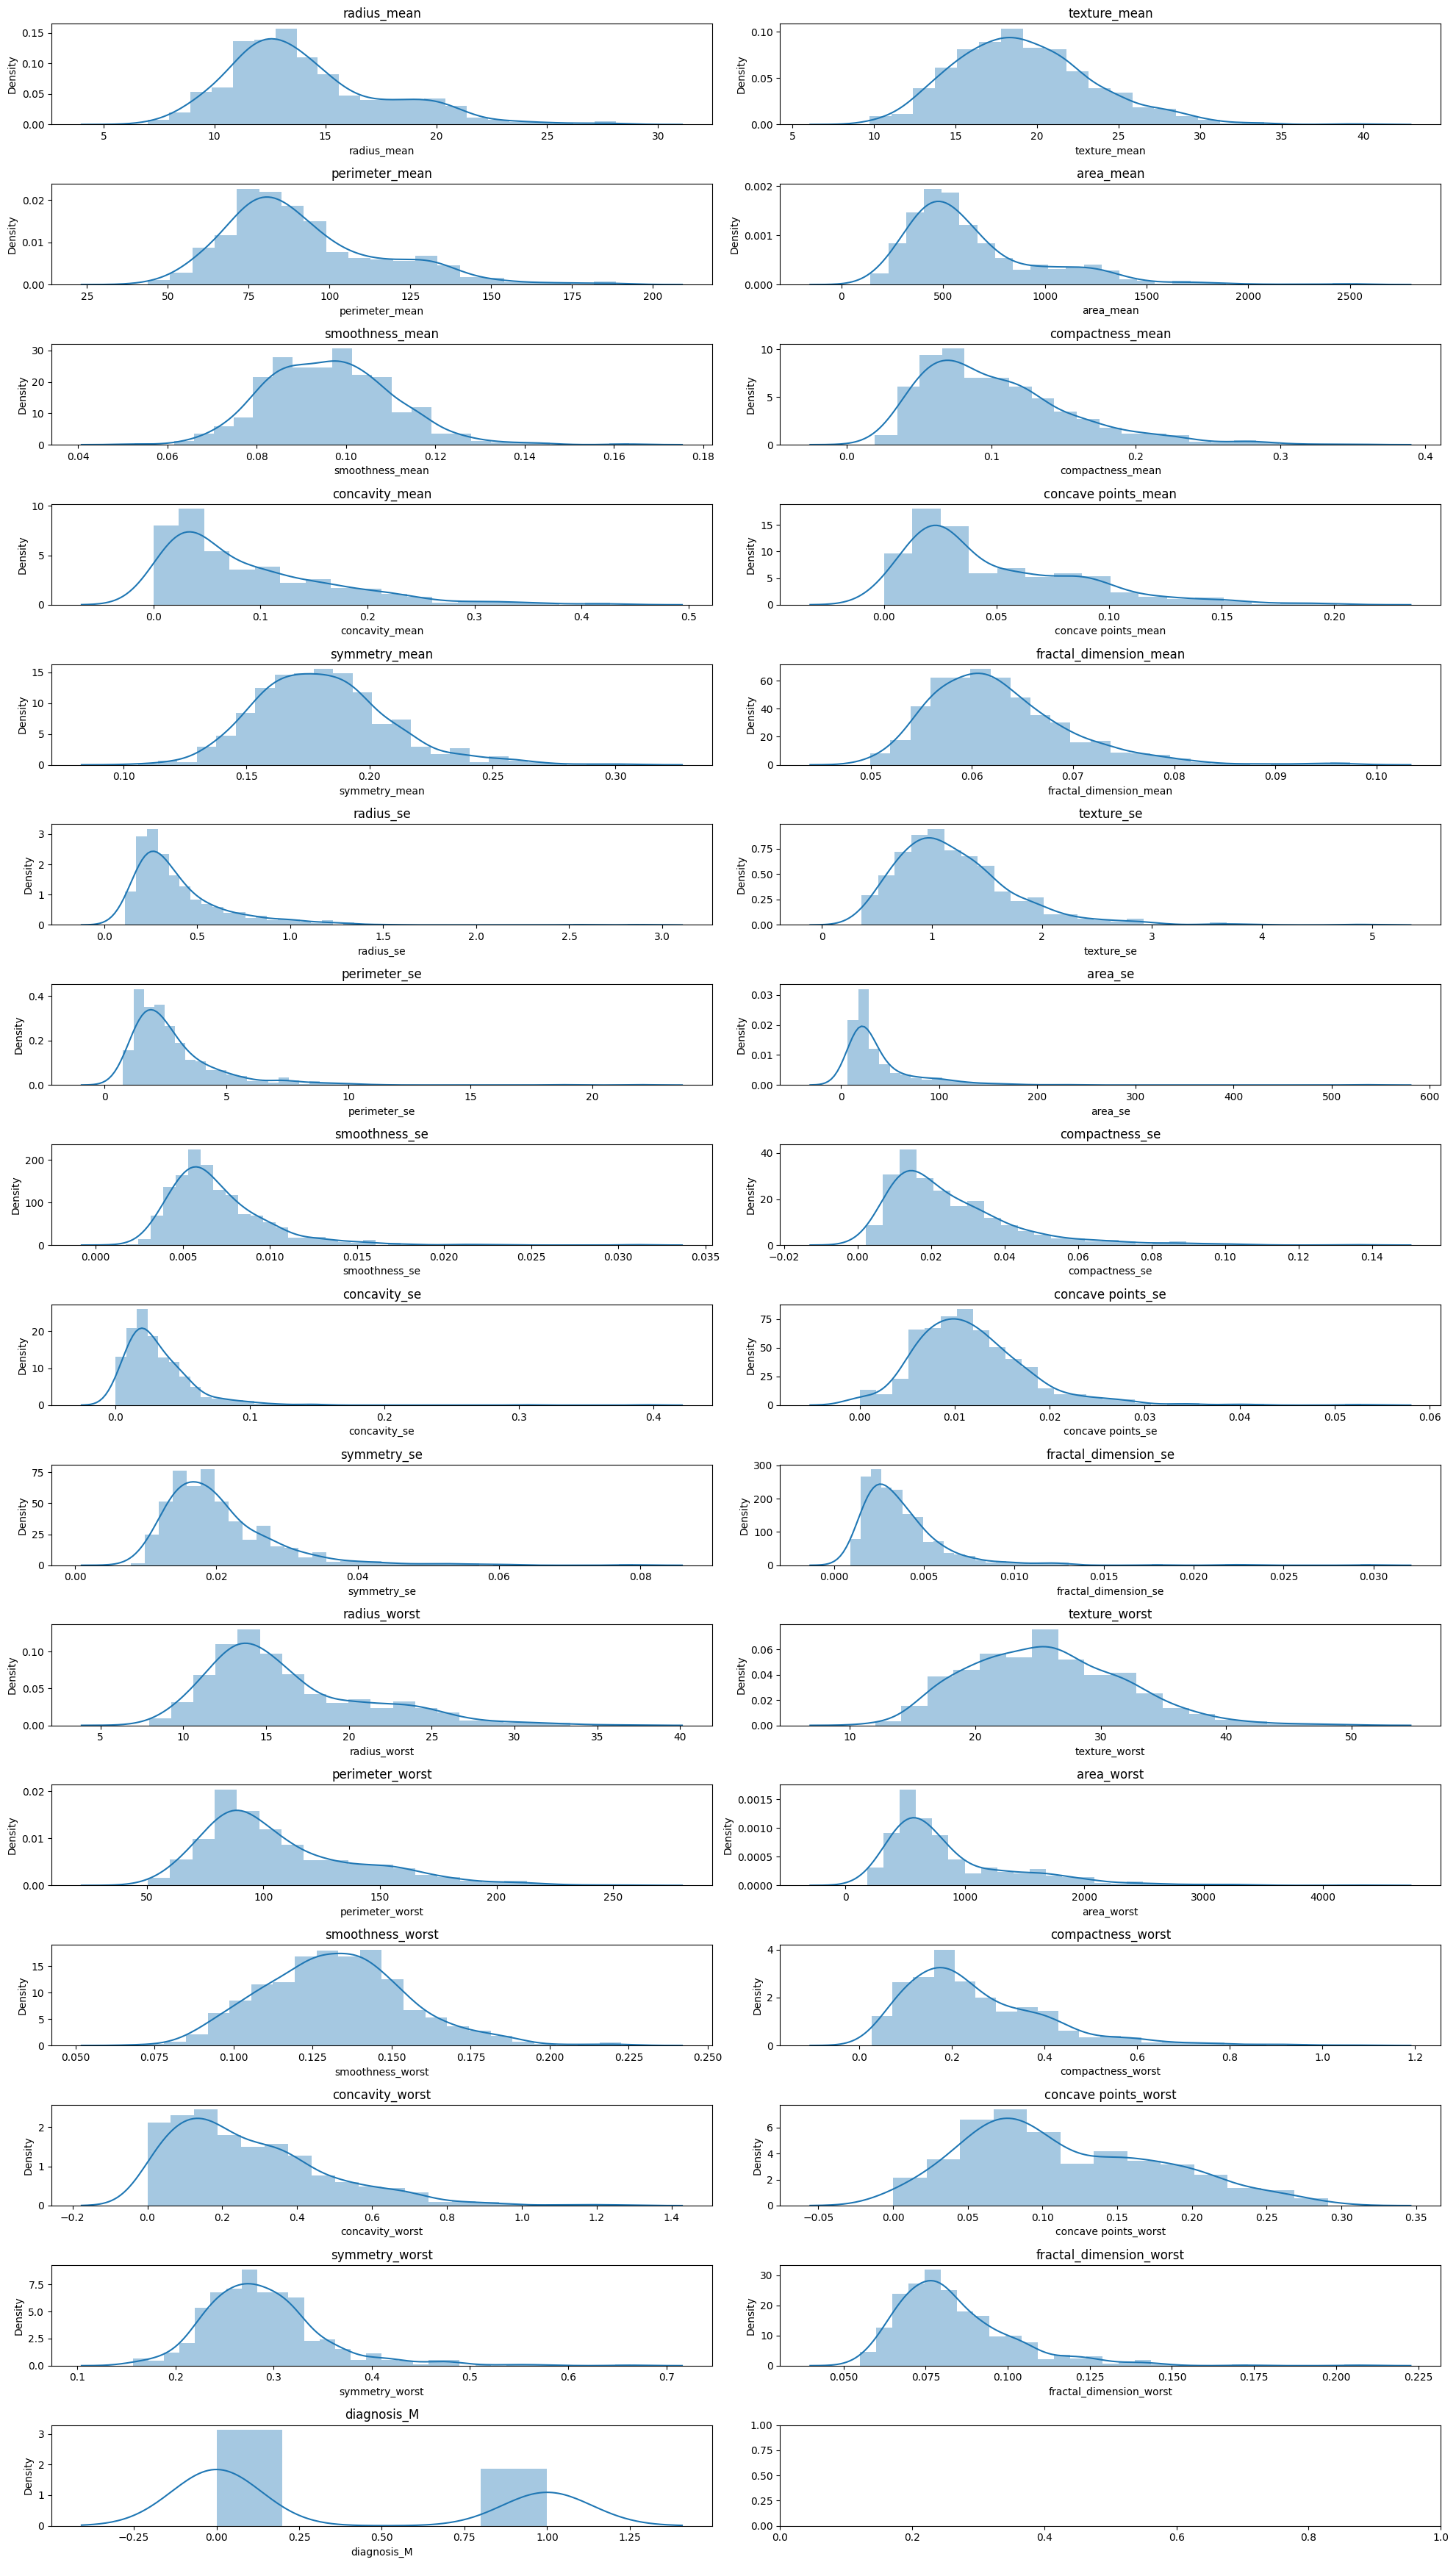

In [ ]:
cols = data.columns

fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/2)), ncols = 2, figsize = (20, 35))

i,j = 0,0
for c in cols:

  sns.distplot(data[c], hist = True, kde = True, ax = ax[i,j])

  ax[i,j].set_title(c)

  j+=1
  if j==2:
      i+=1
      j=0

plt.tight_layout()

In [ ]:
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------radius_mean------
Skewness: 0.942380
Kurtosis: 0.845522
------texture_mean------
Skewness: 0.650450
Kurtosis: 0.758319
------perimeter_mean------
Skewness: 0.990650
Kurtosis: 0.972214
------area_mean------
Skewness: 1.645732
Kurtosis: 3.652303
------smoothness_mean------
Skewness: 0.456324
Kurtosis: 0.855975
------compactness_mean------
Skewness: 1.190123
Kurtosis: 1.650130
------concavity_mean------
Skewness: 1.401180
Kurtosis: 1.998638
------concave points_mean------
Skewness: 1.171180
Kurtosis: 1.066556
------symmetry_mean------
Skewness: 0.725609
Kurtosis: 1.287933
------fractal_dimension_mean------
Skewness: 1.304489
Kurtosis: 3.005892
------radius_se------
Skewness: 3.088612
Kurtosis: 17.686726
------texture_se------
Skewness: 1.646444
Kurtosis: 5.349169
------perimeter_se------
Skewness: 3.443615
Kurtosis: 21.401905
------area_se------
Skewness: 5.447186
Kurtosis: 49.209077
------smoothness_se------
Skewness: 2.314450
Kurtosis: 10.469840
------compactness_se------
Skewness

In [ ]:
columns_to_normalize = ['area_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se','fractal_dimension_se','area_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst', 'concavity_se']
data[columns_to_normalize] = data[columns_to_normalize].apply(lambda x: x + 1e-10 if x.min() == 0 else x)
data[columns_to_normalize] = np.log(data[columns_to_normalize])

data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,6.908755,0.11840,0.27760,0.3001,0.14710,0.2419,-2.541985,...,17.33,184.60,7.610358,0.1622,-0.407066,0.7119,0.2654,-0.776311,-2.129472,1
1,20.57,17.77,132.90,7.189922,0.08474,0.07864,0.0869,0.07017,0.1812,-2.870510,...,23.41,158.80,7.578657,0.1238,-1.678788,0.2416,0.1860,-1.290984,-2.418894,1
2,19.69,21.25,130.00,7.092574,0.10960,0.15990,0.1974,0.12790,0.2069,-2.813577,...,25.53,152.50,7.443664,0.1444,-0.856843,0.4504,0.2430,-1.018047,-2.435203,1
3,11.42,20.38,77.58,5.956096,0.14250,0.28390,0.2414,0.10520,0.2597,-2.328518,...,26.50,98.87,6.341593,0.2098,-0.143524,0.6869,0.2575,-0.409774,-1.754464,1
4,20.29,14.34,135.10,7.167809,0.10030,0.13280,0.1980,0.10430,0.1809,-2.833103,...,16.67,152.20,7.362011,0.1374,-1.584745,0.4000,0.1625,-1.442230,-2.566811,1


In [ ]:
cols = data.columns
for c in cols:
    print(f"------{c}------")
    print("Skewness: %f" % data[c].skew())
    print("Kurtosis: %f" % data[c].kurt())

------radius_mean------
Skewness: 0.942380
Kurtosis: 0.845522
------texture_mean------
Skewness: 0.650450
Kurtosis: 0.758319
------perimeter_mean------
Skewness: 0.990650
Kurtosis: 0.972214
------area_mean------
Skewness: 0.284957
Kurtosis: -0.112242
------smoothness_mean------
Skewness: 0.456324
Kurtosis: 0.855975
------compactness_mean------
Skewness: 1.190123
Kurtosis: 1.650130
------concavity_mean------
Skewness: 1.401180
Kurtosis: 1.998638
------concave points_mean------
Skewness: 1.171180
Kurtosis: 1.066556
------symmetry_mean------
Skewness: 0.725609
Kurtosis: 1.287933
------fractal_dimension_mean------
Skewness: 0.853573
Kurtosis: 1.295815
------radius_se------
Skewness: 0.572974
Kurtosis: 0.156481
------texture_se------
Skewness: 0.029191
Kurtosis: 0.064204
------perimeter_se------
Skewness: 0.637943
Kurtosis: 0.374893
------area_se------
Skewness: 0.797609
Kurtosis: 0.376066
------smoothness_se------
Skewness: 0.404364
Kurtosis: 0.791833
------compactness_se------
Skewness: -

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

sc_X = StandardScaler()
X = data.drop(columns='diagnosis_M')
y= pd.DataFrame(data['diagnosis_M'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifierTree = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTree.fit(X_train_sc, y_train)
y_pred_classifierTree  = classifierTree.predict(X_test_sc)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_classifierTree)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[86  4]
 [ 2 51]]


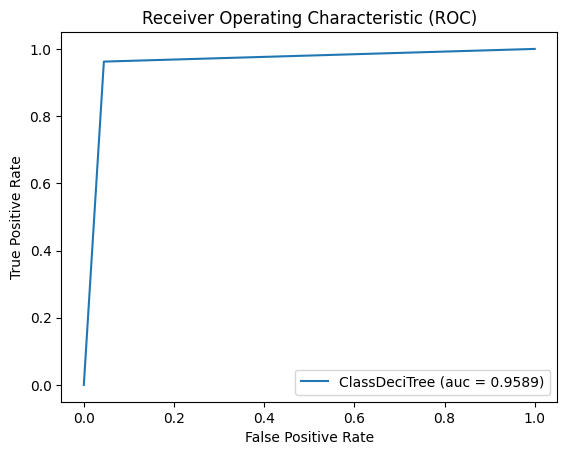

In [ ]:
# Graficar la curva ROC
plt.figure()
y_prob_classifierTree  = classifierTree.predict_proba(X_test_sc)
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test, y_prob_classifierTree[:, 1])
auc_classifierTree = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTree)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

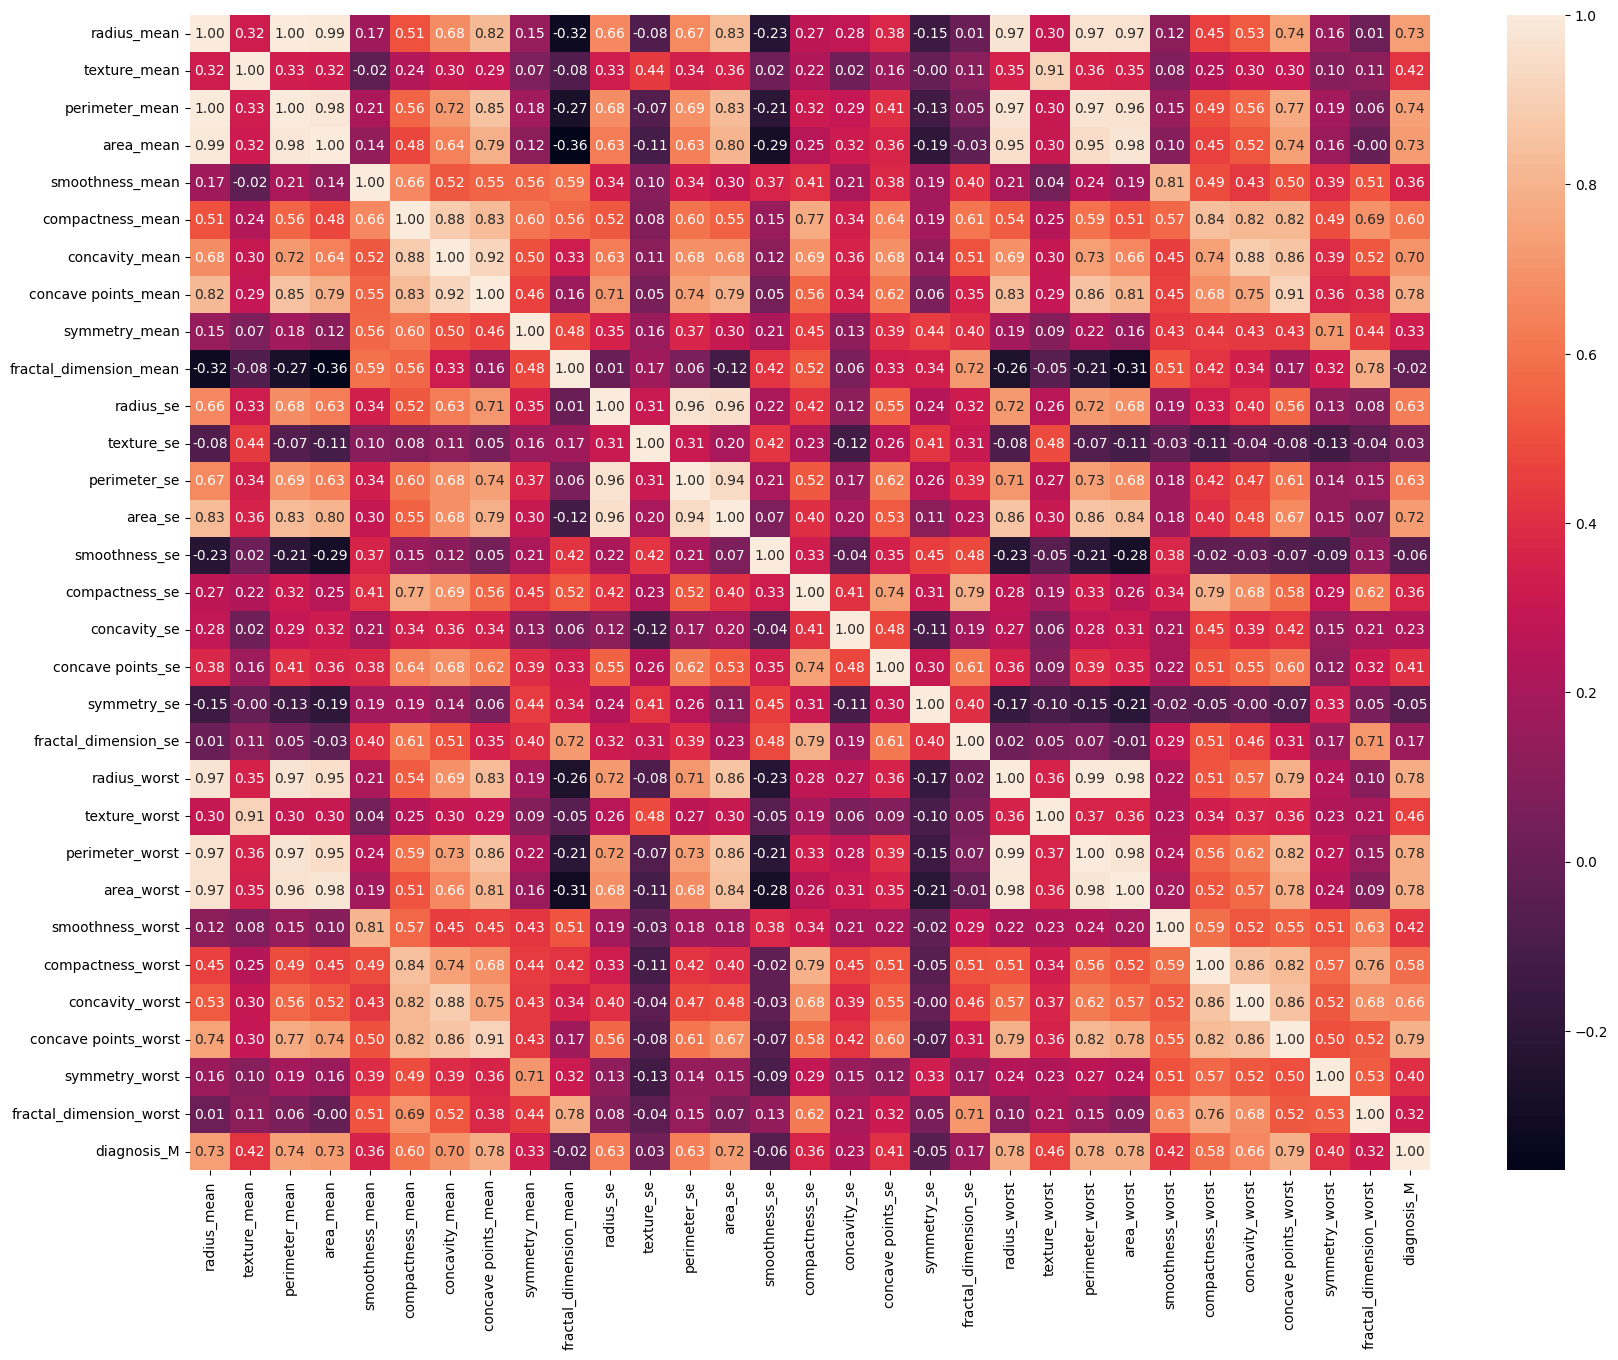

In [ ]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(data.corr(), annot=True, fmt = '.2f')
plt.show()

##Importancia de las variables

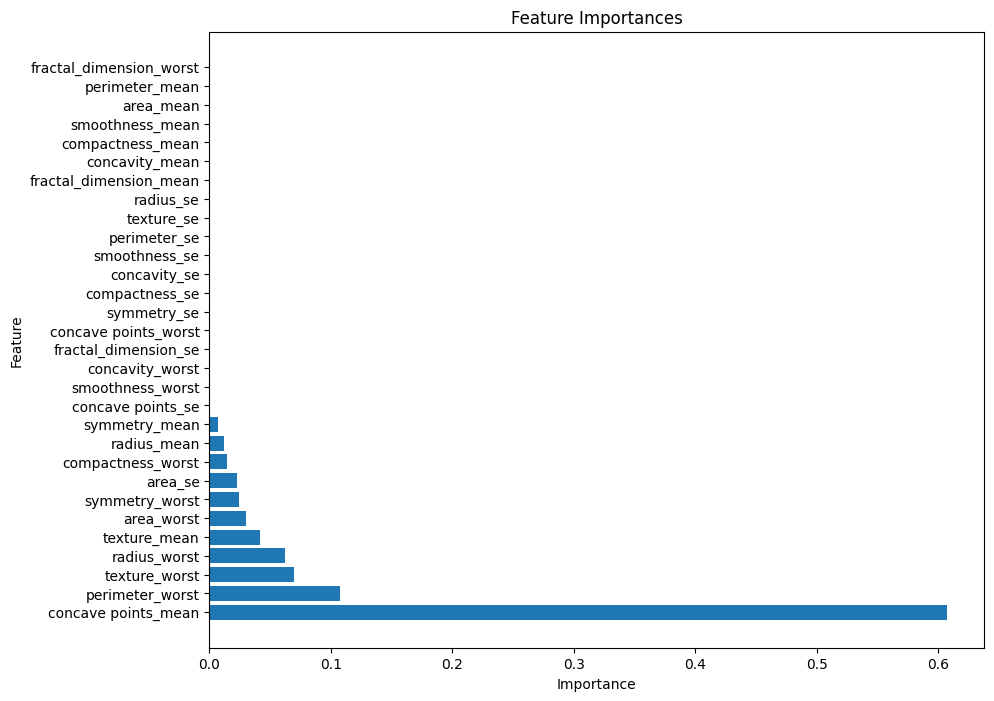

In [ ]:
feature_importances = classifierTree.feature_importances_

# Crear un DataFrame para visualizar las importancias de características
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar las importancias de características
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

##Selección univariante

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# feature extraction
test = SelectKBest(score_func=f_classif, k=2)
test.fit(X_train, y_train)
importance_kbest = test.scores_
importance_kbest

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.56888468e+02, 8.07899168e+01, 4.90890258e+02, 4.58616512e+02,
       6.91090732e+01, 2.51091933e+02, 3.77169033e+02, 6.40392388e+02,
       5.64534892e+01, 4.80085193e-01, 2.80470805e+02, 1.14652186e-02,
       2.84639094e+02, 4.59368701e+02, 2.02691545e+00, 5.60133595e+01,
       2.04254198e+01, 6.90719571e+01, 2.36479688e+00, 9.83406844e+00,
       6.11484676e+02, 1.04059005e+02, 6.34234486e+02, 6.54614587e+02,
       9.71806726e+01, 2.20742215e+02, 3.24298240e+02, 7.30475928e+02,
       8.90314776e+01, 4.94101029e+01])

##Eliminación recursiva de características

In [ ]:
from sklearn.feature_selection import RFE

# feature extraction
rfe = RFE(estimator=classifierTree, n_features_to_select=2)
rfe.fit(X_train_sc, y_train)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)


Num Features: 2
Selected Features: [False False False False False False False  True False False False False
 False False False False False False False False False False  True False
 False False False False False False]
Feature Ranking: [24 23  7 20 16 17 15  1 14 25 27 13 12  6 29 26 21 22 19 18  3  2  1  5
 11 10  9  8  4 28]


In [ ]:
selected_features = [feature for feature, selected in zip(X, rfe.support_) if selected]
print("Selected Features:", selected_features)

Selected Features: ['concave points_mean', 'perimeter_worst']


In [ ]:
columns_to_keep = ['concave points_mean', 'perimeter_worst']
X2 = data.loc[:, columns_to_keep]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = 0.25, random_state = 0)
sc_X2=StandardScaler()
X_train_sc2 = sc_X2.fit_transform(X_train2)
X_test_sc2 = sc_X2.transform(X_test2)
classifierTree2 = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTree2.fit(X_train_sc2, y_train)
y_pred_classifierTree2  = classifierTree2.predict(X_test_sc2)

In [ ]:
conf_matrix2 = confusion_matrix(y_test, y_pred_classifierTree2)
print("Matriz de Confusión:")
print(conf_matrix2)

Matriz de Confusión:
[[82  8]
 [ 7 46]]


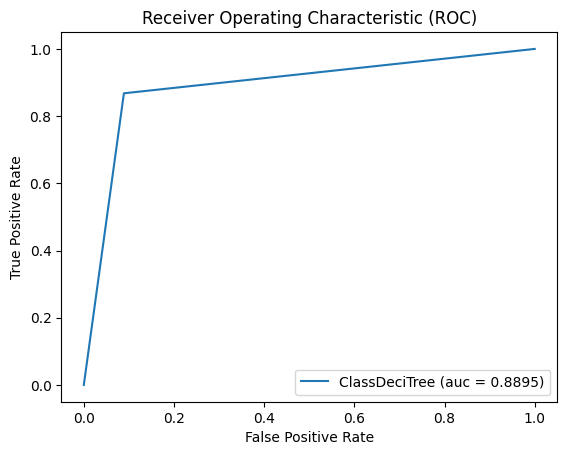

In [ ]:
plt.figure()
y_prob_classifierTree2  = classifierTree2.predict_proba(X_test_sc2)
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test2, y_prob_classifierTree2[:, 1])
auc_classifierTree2 = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTree2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

##PCA


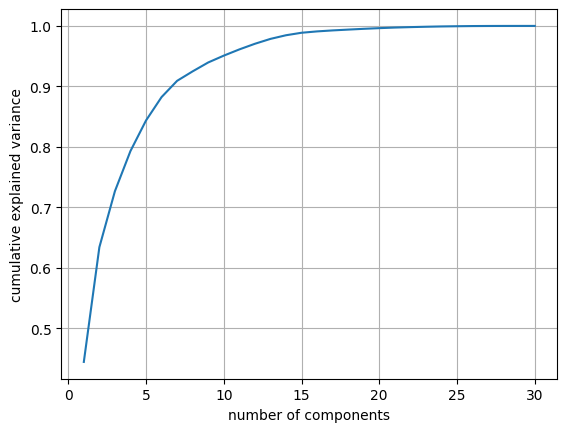

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(X_train_sc)
cum_expvar = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(cum_expvar)+1),cum_expvar)
plt.grid()
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
print(pca.explained_variance_ratio_)
print(cum_expvar)

[4.44425937e-01 1.89699020e-01 9.26324475e-02 6.63954564e-02
 5.04968120e-02 3.86895030e-02 2.68913467e-02 1.56639434e-02
 1.46884877e-02 1.12703275e-02 1.02890371e-02 9.31083680e-03
 8.08142527e-03 6.03705870e-03 4.11791417e-03 2.24817876e-03
 1.63398841e-03 1.35045143e-03 1.29021456e-03 1.11573989e-03
 9.60478692e-04 7.25855010e-04 6.12865125e-04 5.21068306e-04
 3.48407762e-04 2.88577139e-04 1.24645978e-04 6.82279629e-05
 1.75848334e-05 4.16311759e-06]
[0.44442594 0.63412496 0.7267574  0.79315286 0.84364967 0.88233918
 0.90923052 0.92489447 0.93958295 0.95085328 0.96114232 0.97045315
 0.97853458 0.98457164 0.98868955 0.99093773 0.99257172 0.99392217
 0.99521239 0.99632813 0.9972886  0.99801446 0.99862732 0.99914839
 0.9994968  0.99978538 0.99991002 0.99997825 0.99999584 1.        ]


In [ ]:
ppal_comps = np.argmax(cum_expvar >=0.50) + 1
ppal_comps

2

In [ ]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train_sc)
pca_test = pca.transform(X_test_sc)
pca_train.shape

(426, 2)

In [ ]:
classifierTreePCA = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifierTreePCA.fit(pca_train, y_train)
y_pred_classifierTreePCA  = classifierTreePCA.predict(pca_test)

In [ ]:
conf_matrixPCA = confusion_matrix(y_test, y_pred_classifierTreePCA)
print("Matriz de Confusión:")
print(conf_matrixPCA)

Matriz de Confusión:
[[85  5]
 [ 5 48]]


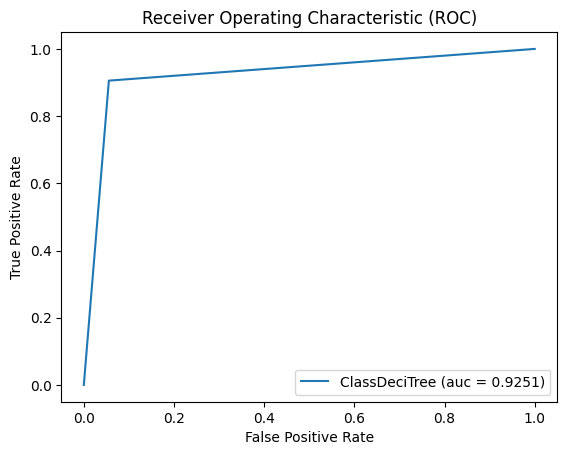

In [ ]:
plt.figure()
y_prob_classifierTreePCA  = classifierTreePCA.predict_proba(pca_test)
classifierTree_fpr, classifierTree_tpr, threshold = roc_curve(y_test, y_prob_classifierTreePCA[:, 1])
auc_classifierTreePCA = auc(classifierTree_fpr, classifierTree_tpr)
plt.plot(classifierTree_fpr, classifierTree_tpr, linestyle='-', label='ClassDeciTree (auc = %0.4f)' % auc_classifierTreePCA)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print("Matriz de Confusión:")
print(conf_matrix)
print()
print("Matriz de Confusión 2:")
print(conf_matrix2)
print()
print("Matriz de Confusión PCA:")
print(conf_matrixPCA)

Matriz de Confusión:
[[86  4]
 [ 2 51]]

Matriz de Confusión 2:
[[82  8]
 [ 7 46]]

Matriz de Confusión PCA:
[[85  5]
 [ 5 48]]


En conclusión, tan solo con coger un 2 columnas de las 30 podemos obtener un 50 por ciento de la información. Con tan solo un par de columnas se puede conseguir resultados buenos también. De hecho si en vez de 2 columnas se usasen algunas más, se podrían ver resultados muy parecidos al que se obtiene con las 30. También, el hecho de usar PCA mejora mucho la eficiencia del modelo usando menos columnas.